# Part 2: Choosing binoms in a company (matching)

Run using Python 3.10.

## 2.1 - Introduction

A manager must choose binoms among a set of employees in a company. Howe-
ver, while some employees may work together, others may not. This information
is represented in a graph G. Each employee is represented by a node in G. If two
employees are represented by the nodes A and B, there is an edge between these
two nodes if and only if they may work together. Choosing binoms corresponds to
perform a matching in the graph G.

The manager would like to form a number of binoms that is as large as possible.
Hence, The goal of this exercise if to perform a matching of large size. This does
not necessary mean that you have to find an optimal matching in the strict sense of
the term, but the larger the size of the matching, the better it is.


## 2.2 - Random graphs

We must first generate a random graph and visualise it.


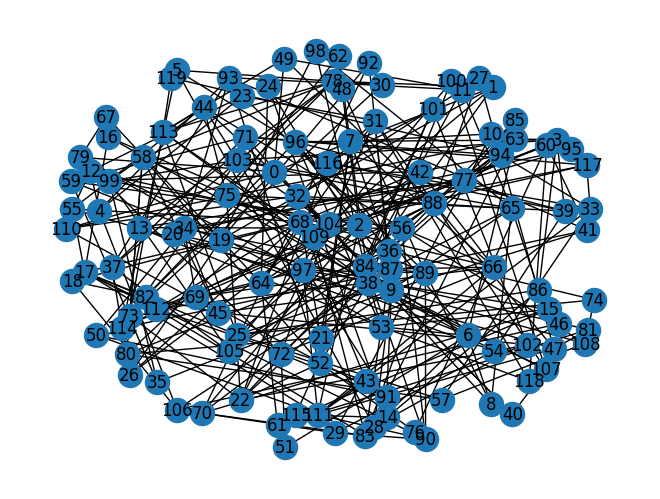

In [151]:
import networkx as nx


# Create a graph
N = 120
P = 0.04
G = nx.gnp_random_graph(N, P)

# Visualize the graph
pos = nx.spring_layout(G, k=0.8, iterations=30)  # Makes it less cluttered
nx.draw(G, pos=pos, with_labels=True)


## 2.3 - Exercise

Now that we have a random graph, we can perform a matching on it using different algorithms. The goal is to find a matching of large size. The larger the size of the matching, the better it is.

### First method: greedy algorithm

The most straightforward approach is to use a greedy algorithm. This algorithm iterates through each edge of the graph and adds it the list of matchings if the nodes haven't been already visited.

Its complexity is tied to the number of edges in the graph (we iterate through each edge exactly once), which is $O(|E|)$, which is indeed polynomial time.

The matchings are highlighted in red in the graph.


Is maximal: True


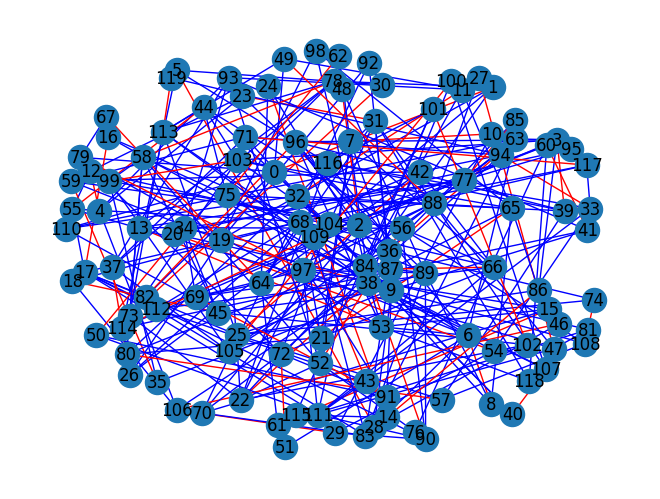

In [152]:
# Greedy algorithm
def greedy_maximal_matching(G: nx.Graph) -> list:
    """
    Greedy algorithm for finding a maximal matching in a graph.
    """
    matchings = []
    nodes = set()
    for edge in G.edges():
        u, v = edge
        if u not in nodes and v not in nodes and u != v:
            if edge not in matchings:
                matchings.append(edge)
            nodes.add(u)
            nodes.add(v)
    return matchings


matchings = greedy_maximal_matching(G)

# Check if the matching is indeed maximal
print(f"Is maximal: {nx.is_maximal_matching(G, matchings)}")

# Visualize the dominating set
edge_colors = ['red' if edge in matchings else 'blue' for edge in G.edges()]
nx.draw(G, pos=pos, with_labels=True, edge_color=edge_colors)


### Second method: greedy algorithm with random order

The greedy algorithm is not optimal. We can improve it by iterating through the edges in a random order. This way, we can avoid the case where the first edges we iterate through are always the ones tied to the most nodes.

Its complexity is tied to the number of edges in the graph (we iterate through each edge exactly once), which is $O(|E|)$, which is indeed polynomial time. (The shuffling of the edges is $O(|E|)$ as well ([per its implementation](https://stackoverflow.com/questions/9371079/python-shuffle-algorithm-performance)) so we end up with $O(2 \times |E|)$ which is still polynomial time).

The matchings are highlighted in red in the graph.

Is maximal: True


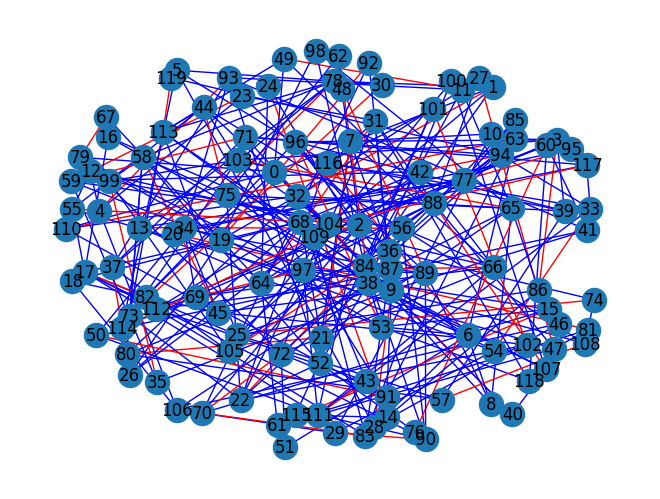

In [153]:
from random import shuffle

# Greedy algorithm
def greedy_maximal_random_order_matching(G: nx.Graph) -> list:
    """
    Greedy algorithm for finding a maximal matching in a graph iterating through edges in a random order.
    """
    edges = list(G.edges())
    shuffle(edges)
    matchings = []
    nodes = set()
    for edge in edges:
        u, v = edge
        if u not in nodes and v not in nodes and u != v:
            if edge not in matchings:
                matchings.append(edge)
            nodes.add(u)
            nodes.add(v)
    return matchings


matchings = greedy_maximal_random_order_matching(G)

# Check if the matching is indeed maximal
print(f"Is maximal: {nx.is_maximal_matching(G, matchings)}")

# Visualize the dominating set
edge_colors = ['red' if edge in matchings else 'blue' for edge in G.edges()]
nx.draw(G, pos=pos, with_labels=True, edge_color=edge_colors)


### Performance comparison

